# Histrogram
Histrogram is used to plot freqency distribution of series

Here, we take an example of Anual Rate of Charlotte City Employee and to summarize the trend and identify outliars.

We use scipy.stats to draw normal distribution curve, we will adjust the bin size and mask the anual rate to 140000, we will ignore any value higher than that.  We will also put mean and standard deviation in the plot. We will also going to normlize our histrogram to draw the density and return density.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#import data from csv
df  =   pd.read_csv('./City_Employee_Salaries_March_2018.csv')
print(df.head())

                     Name   Unit                   Dept            Job_Title  \
0         Jones,Marcus D.  CTMGR  City Manager's Office         City Manager   
1       Hagemann,Robert E  ATTOR          City Attorney        City Attorney   
2         Lewis Jr,John M   CATS              Executive    Transit  Director   
3           Cagle,Brent D   AVIA      Admin - Executive    Aviation Director   
4  Joy-Hogg,Sabrina Beena  CTMGR  City Manager's Office  Deputy City Manager   

   Annual_Rt  Hrly_Rate Full_Part Reg_Temp  FID  
0  318000.00     152.88         F        R    1  
1  248491.82     119.47         F        R    2  
2  245924.30     118.23         F        R    3  
3  236042.01     113.48         F        R    4  
4  225500.00     108.41         F        R    5  


          Annual_Rt    Hrly_Rate          FID
count    7454.00000  7454.000000  7454.000000
mean    60426.99328    28.578617  3727.500000
std     23446.00520    10.448333  2151.928786
min         0.00000     0.000000     1.000000
25%     45052.66000    21.410000  1864.250000
50%     59144.93500    26.630000  3727.500000
75%     72441.61000    33.202500  5590.750000
max    318000.00000   152.880000  7454.000000


(array([4.140e+02, 4.007e+03, 2.594e+03, 3.410e+02, 6.500e+01, 2.000e+01,
        8.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  31800.,  63600.,  95400., 127200., 159000., 190800.,
        222600., 254400., 286200., 318000.]),
 <BarContainer object of 10 artists>)

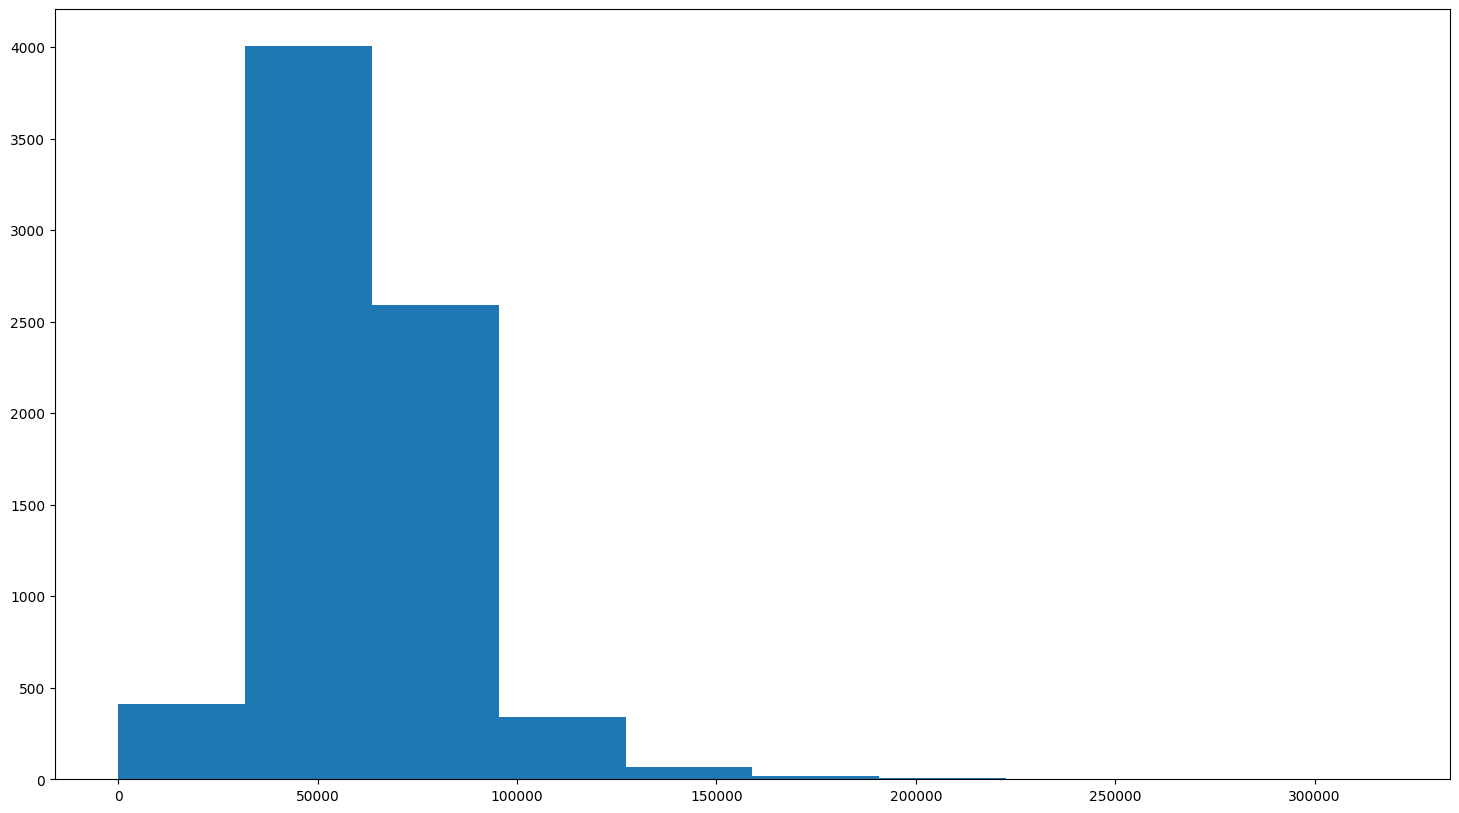

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#import data from csv
df  =   pd.read_csv('./City_Employee_Salaries_March_2018.csv')
#df.head()
print(df.describe())
#plot histrogram
plt.figure(figsize=(18,10))
plt.hist(df['Annual_Rt'])

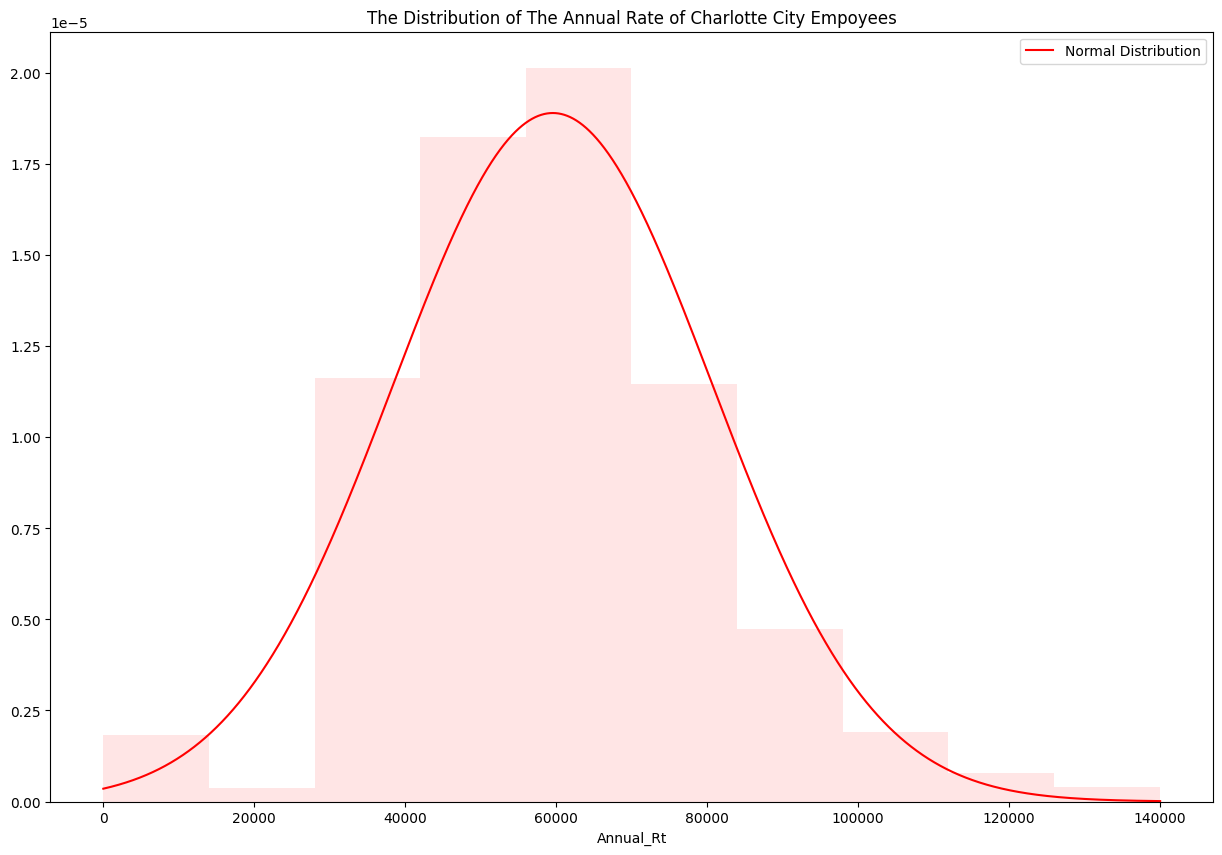

In [36]:
# from above we can see that there is very few samples above 150000 mark, so we will resize the bin and mask the graph up to 150000
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

#import data
df  = pd.read_csv('./City_Employee_Salaries_March_2018.csv')
df.describe()

#data prep
x   =   np.arange(0,140000, 1) # create a line from 0 to 140000 with step 1 for smooth curve plotting
ar  =   df['Annual_Rt'] # Create a series for masking and filter
mask    =   ar  <   140000  # boolean masking, mask is an array having true or false based on the condition provided
df1 =   ar[mask]    # Create a new series appling the filter created in above line

#plot histrogram
plt.figure(figsize=(15,10)) #bin size tell number of bar lines, and density is to take logerythmic value, alpha and color is just visual aspect
plt.hist(df1, bins=10,density=True,alpha=0.1, color='r')

#plot normal distribution with mean(avarage) and standard deviation (distribution)
mu, std = norm.fit(df1) 
plt.plot(x, norm.pdf(x, mu, std), 'r-', label='Normal Distribution')

plt.xlabel('Annual_Rt')
plt.title('The Distribution of The Annual Rate of Charlotte City Empoyees')
plt.legend() # this works only if the label='' property is used in plt.plot()
plt.show()
